In [2]:
library(tidyverse)
library(gtools)
library(tibble)
library(dplyr)
library(psy)
library(nFactors)

Now I am going to get cronbach's alpha for items

In [7]:
getwd()

[1] "C:/Users/Sam Cannon/Desktop/Python/SIOP 2020"

In [12]:
data_1 <- read.csv("factor_analysis_data.csv", header = T)
df <- read.csv("composite_df.csv", header = TRUE)

Learning Alpha

In [13]:
cronbach(data_1[, 2:11])

$sample.size
[1] 292

$number.of.items
[1] 10

$alpha
[1] 0.9183583

Belonging and Authenticity Alpha

Factor Analysis with 2 Factors

Maximum Likelihood Factor Analysis
entering raw data and extracting 3 factors,
with promax rotation

In [18]:
# drop "x" column
data_1 <- subset(data_1, select = -c(X))

In [20]:
head(data_1)

Learning_1,Learning_2,Learning_3,Learning_4,Learning_5,Learning_6,Learning_7,Learning_8,Learn_1,Learn_2
2,1,2,2,2,2,2,1,6,6
3,2,2,3,3,3,3,3,2,2
4,4,4,4,4,4,4,4,5,5
4,4,4,4,4,4,4,4,4,4
3,3,3,3,3,3,3,3,6,6
3,3,3,3,3,3,3,3,6,6


## How many factors should we have?
- use a scree plot to determine

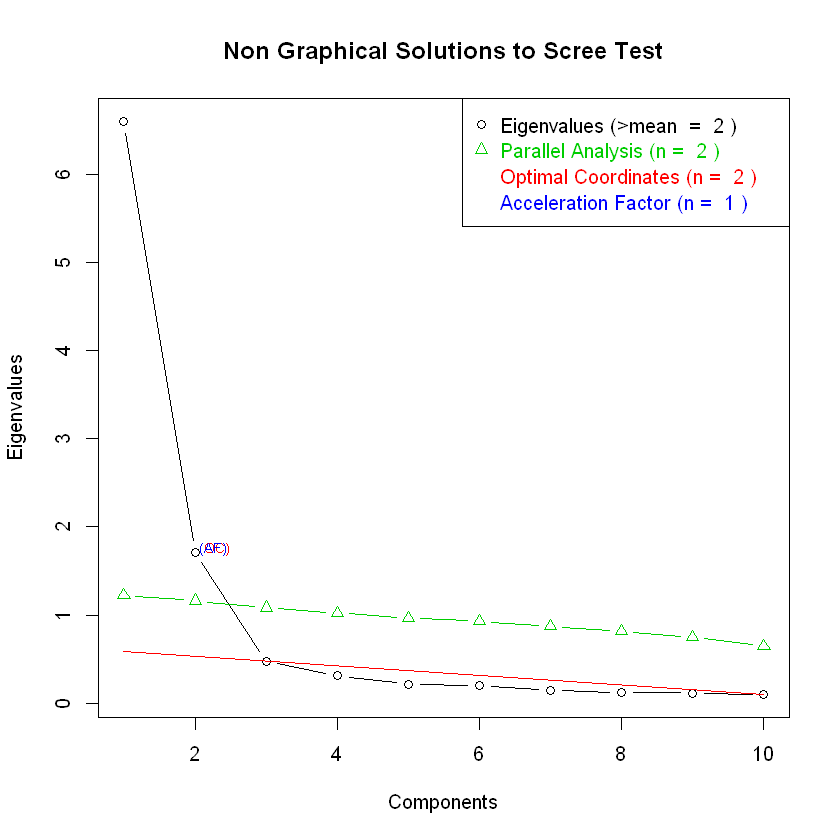

In [30]:
ev <- eigen(cor(data_1)) # get eigenvalues
ap <- parallel(subject=nrow(data_1),var=ncol(data_1),
  rep=50,cent=.05)
nS <- nScree(x=ev$values, aparallel=ap$eigen$qevpea)
plotnScree(nS)

## Use 2 factors, as suggested by the scree plot


Call:
factanal(x = data_1, factors = 2, rotation = "promax")

Uniquenesses:
Learning_1 Learning_2 Learning_3 Learning_4 Learning_5 Learning_6 Learning_7 
      0.29       0.20       0.19       0.23       0.25       0.18       0.19 
Learning_8    Learn_1    Learn_2 
      0.25       0.00       0.21 

Loadings:
           Factor1 Factor2
Learning_1  0.84          
Learning_2  0.88          
Learning_3  0.89          
Learning_4  0.86          
Learning_5  0.86          
Learning_6  0.91          
Learning_7  0.91          
Learning_8  0.88          
Learn_1             1.00  
Learn_2             0.89  

               Factor1 Factor2
SS loadings       6.19    1.79
Proportion Var    0.62    0.18
Cumulative Var    0.62    0.80

Factor Correlations:
        Factor1 Factor2
Factor1    1.00    0.28
Factor2    0.28    1.00

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 246.51 on 26 degrees of freedom.
The p-value is 8.41e-38 


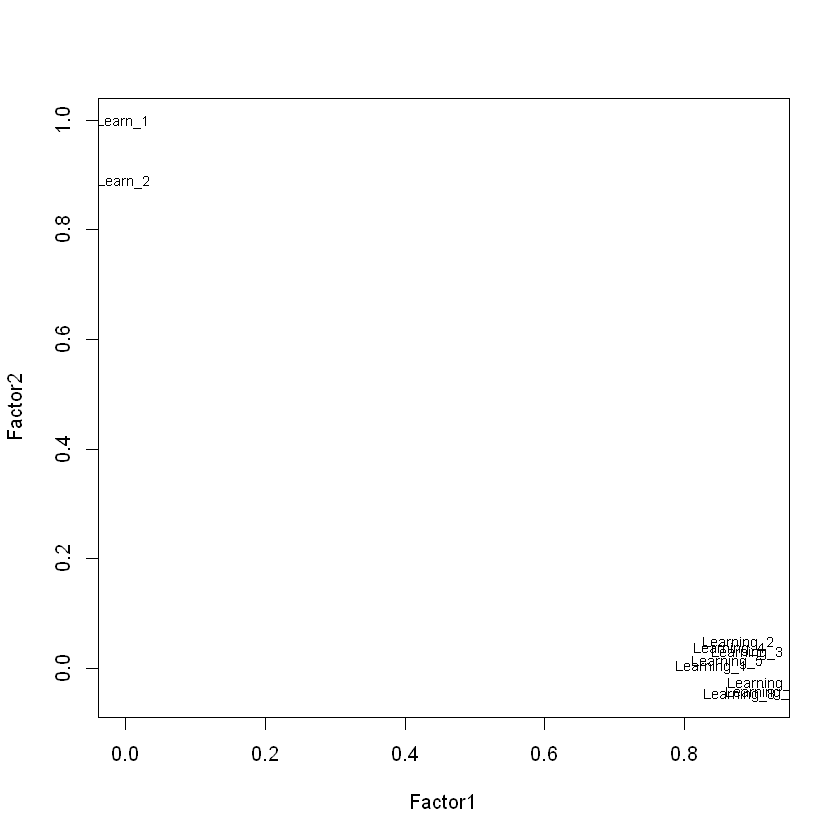

In [25]:
fit <- factanal(data_1, 2, rotation = "promax")
print(fit, digits=2, cutoff=.3, sort=TRUE)
# plot factor 1 by factor 2
load <- fit$loadings[,1:2]
plot(load,type="n") # set up plot
text(load,labels=names(data_1),cex=.7) # add variable names

# Begin Mediation Analysis with Learning/Learn Together

In [7]:
head(df)

X,turnover_mean,inclusion_mean,learning_mean,micro_count
0,4,3.8750,2.6,14
1,0,1.8125,2.6,6
2,3,4.5000,4.2,14
3,3,4.0000,4.0,14
4,3,4.5000,3.6,14
5,1,4.0000,3.6,14


In [8]:
#Baron and Kenny Method.
#First, regress inclusion on learning to obtain a path.
apath<-lm(inclusion_mean ~ learning_mean, data = df)
summary(apath)


Call:
lm(formula = inclusion_mean ~ learning_mean, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9799 -0.5294  0.1264  0.5922  1.6795 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.72572    0.15511  17.573  < 2e-16 ***
learning_mean  0.37028    0.05076   7.294 2.88e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8385 on 290 degrees of freedom
Multiple R-squared:  0.155,	Adjusted R-squared:  0.1521 
F-statistic:  53.2 on 1 and 290 DF,  p-value: 2.883e-12


In [9]:
#Next, obtain c path by regressing turnover on learning and inclusion

cpath<-lm(turnover_mean ~ learning_mean + inclusion_mean, data = df)
summary(cpath)  


Call:
lm(formula = turnover_mean ~ learning_mean + inclusion_mean, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.11497 -0.84138  0.09696  0.85503  3.01568 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.20033    0.29658  -4.047 6.66e-05 ***
learning_mean   0.03000    0.07348   0.408    0.683    
inclusion_mean  0.84386    0.07814  10.800  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.116 on 289 degrees of freedom
Multiple R-squared:   0.33,	Adjusted R-squared:  0.3254 
F-statistic: 71.17 on 2 and 289 DF,  p-value: < 2.2e-16


In [39]:
#Run Sobel test.
library(bda)
mediation.test(df$inclusion_mean, df$learning_mean, df$turnover_mean) #Order: med,IV,DV

,Sobel,Aroian,Goodman
z.value,6.044640e+00,6.026923e+00,6.062514e+00
p.value,1.497441e-09,1.671106e-09,1.340103e-09


In [23]:
# Conduct bootsrapping procedure to determine significance of indirect effect
# (apath * bpath).

library(MBESS)

mediation(df$learning_mean, df$inclusion_mean, df$turnover_mean, conf.level = 0.95, bootstrap = T, B = 5000, which.boot="Percentile")

[1] "Bootstrap resampling has begun. This process may take a considerable amount of time if the number of replications is large, which is optimal for the bootstrap procedure."


,Estimate,CI.Lower_Percentile,CI.Upper_Percentile
Indirect.Effect,0.31246007,0.22076708,0.41160188
Indirect.Effect.Partially.Standardized,0.23002496,0.16418466,0.30126525
Index.of.Mediation,0.22273171,0.15584904,0.29583826
R2_4.5,0.05920697,0.01203253,0.11799703
R2_4.6,0.04457520,0.02276646,0.07435383
R2_4.7,0.13507754,0.07641664,0.19703451
Ratio.of.Indirect.to.Total.Effect,0.91239496,0.60286172,1.57236127
Ratio.of.Indirect.to.Direct.Effect,10.41486842,-54.42266075,63.52444324
Success.of.Surrogate.Endpoint,0.92488190,0.56165013,1.27252642
Residual.Based_Gamma,0.07058266,0.03013600,0.12093267


# Creating Correlation Table and Mediations for Learn/Learning Separately

In [3]:
corr_df <- read.csv("AOM_correlation_data.csv", header = TRUE)

__This is the mediation for learning separate from learn__

In [5]:
library(MBESS)
mediation(corr_df$learning_composite, corr_df$inclusion_mean, corr_df$turnover_mean, conf.level = 0.95, bootstrap = T, B = 5000, which.boot="Percentile")

[1] "Bootstrap resampling has begun. This process may take a considerable amount of time if the number of replications is large, which is optimal for the bootstrap procedure."


,Estimate,CI.Lower_Percentile,CI.Upper_Percentile
Indirect.Effect,0.23371684,0.150695413,0.32212323
Indirect.Effect.Partially.Standardized,0.17205624,0.111928936,0.23683471
Index.of.Mediation,0.17907507,0.113895738,0.24765253
R2_4.5,0.03220365,-0.004550556,0.07948885
R2_4.6,0.02990992,0.012506215,0.05458876
R2_4.7,0.09074313,0.040914531,0.14864273
Ratio.of.Indirect.to.Total.Effect,0.99788780,0.620246495,2.48200502
Ratio.of.Indirect.to.Direct.Effect,472.44021424,-48.654816804,48.07279880
Success.of.Surrogate.Endpoint,0.85805421,0.349923281,1.29747967
Residual.Based_Gamma,0.04792084,0.014596296,0.08887595


__This is the mediation for learn separate from learning__

In [6]:
mediation(corr_df$learn_composite, corr_df$inclusion_mean, corr_df$turnover_mean, conf.level = 0.95, bootstrap = T, B = 5000, which.boot="Percentile")

[1] "Bootstrap resampling has begun. This process may take a considerable amount of time if the number of replications is large, which is optimal for the bootstrap procedure."


,Estimate,CI.Lower_Percentile,CI.Upper_Percentile
Indirect.Effect,0.17639385,0.11739570,0.23776741
Indirect.Effect.Partially.Standardized,0.12985656,0.08752057,0.17400243
Index.of.Mediation,0.20836216,0.13872814,0.27928183
R2_4.5,0.07006734,0.02282369,0.12694549
R2_4.6,0.04014067,0.01868592,0.06855569
R2_4.7,0.12055383,0.06419317,0.17929687
Ratio.of.Indirect.to.Total.Effect,0.76894504,0.50245158,1.24480477
Ratio.of.Indirect.to.Direct.Effect,3.32797455,-28.96833617,35.13702574
Success.of.Surrogate.Endpoint,1.06777874,0.69139945,1.48892118
Residual.Based_Gamma,0.05433648,0.01922414,0.10000089


## Run regression for learn/learning separated

__This is regressing turnover on learning and learn__
- same results as in Python

In [31]:
summary(lm(turnover_mean ~ learning_composite + learn_composite, data = corr_df))


Call:
lm(formula = turnover_mean ~ learning_composite + learn_composite, 
    data = corr_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.52175 -1.11297  0.07423  1.09067  2.72693 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.89944    0.25088   3.585 0.000395 ***
learning_composite  0.15126    0.07611   1.987 0.047818 *  
learn_composite     0.20345    0.04937   4.121 4.93e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.303 on 289 degrees of freedom
Multiple R-squared:  0.08592,	Adjusted R-squared:  0.07959 
F-statistic: 13.58 on 2 and 289 DF,  p-value: 2.303e-06


__This is regressing inclusion on learn and learning separated__
- same results as in Python

In [33]:
summary(lm(inclusion_mean ~ learning_composite + learn_composite, data = corr_df))


Call:
lm(formula = inclusion_mean ~ learning_composite + learn_composite, 
    data = corr_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0736 -0.4915  0.1608  0.5787  1.8401 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.56748    0.15816  16.233  < 2e-16 ***
learning_composite  0.19931    0.04798   4.154 4.31e-05 ***
learn_composite     0.18065    0.03112   5.804 1.70e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8216 on 289 degrees of freedom
Multiple R-squared:  0.1916,	Adjusted R-squared:  0.186 
F-statistic: 34.24 on 2 and 289 DF,  p-value: 4.515e-14


## Begin correlation analysis for data with learn/learning separated

In [3]:
str(corr_df)

'data.frame':	290 obs. of  7 variables:
 $ X                 : int  0 1 2 3 4 5 6 7 8 9 ...
 $ turnover_mean     : num  4 0 3 3 3 ...
 $ inclusion_mean    : num  3.88 1.81 4.5 4 4.5 ...
 $ micro_count       : num  14 6 14 14 14 14 13 14 12 14 ...
 $ learning_composite: num  1.75 2.75 4 4 3 ...
 $ learn_composite   : num  6 2 5 4 6 6 6 5 3 4 ...
 $ Gender            : num  1 0 0 0 1 0 1 0 0 1 ...


In [4]:
corr_df <- subset(corr_df, select = c("turnover_mean", "inclusion_mean", "micro_count", "learning_composite", "learn_composite", "Gender"))

In [5]:
str(corr_df)

'data.frame':	290 obs. of  6 variables:
 $ turnover_mean     : num  4 0 3 3 3 ...
 $ inclusion_mean    : num  3.88 1.81 4.5 4 4.5 ...
 $ micro_count       : num  14 6 14 14 14 14 13 14 12 14 ...
 $ learning_composite: num  1.75 2.75 4 4 3 ...
 $ learn_composite   : num  6 2 5 4 6 6 6 5 3 4 ...
 $ Gender            : num  1 0 0 0 1 0 1 0 0 1 ...


In [8]:
cor(corr_df)

,turnover_mean,inclusion_mean,micro_count,learning_composite,learn_composite,Gender
turnover_mean,1.0000000,0.5717662,0.28444747,0.17378231,0.26482791,-0.10516761
inclusion_mean,0.5717662,1.0000000,0.21003753,0.30632084,0.37016790,-0.10806763
micro_count,0.2844475,0.2100375,1.00000000,-0.04382783,0.27470330,-0.08012611
learning_composite,0.1737823,0.3063208,-0.04382783,1.00000000,0.25879142,-0.01446975
learn_composite,0.2648279,0.3701679,0.27470330,0.25879142,1.00000000,0.05318355
Gender,-0.1051676,-0.1080676,-0.08012611,-0.01446975,0.05318355,1.00000000


## Send to apa table

In [11]:
library(apaTables)
apa.cor.table(corr_df, filename = "AOM_correlation_matrix.doc", table.number = 1)



Table 1 

Means, standard deviations, and correlations with confidence intervals
 

  Variable              M     SD   1           2           3          
  1. turnover_mean      2.09  1.36                                    
                                                                      
  2. inclusion_mean     3.80  0.90 .57**                              
                                   [.49, .64]                         
                                                                      
  3. micro_count        10.87 3.53 .28**       .21**                  
                                   [.18, .39]  [.10, .32]             
                                                                      
  4. learning_composite 2.65  1.04 .17**       .31**       -.04       
                                   [.06, .28]  [.20, .41]  [-.16, .07]
                                                                      
  5. learn_composite    3.89  1.60 .26**       .37**       .27